# Import libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from scipy.stats import pearsonr, ttest_ind, zscore, ttest_rel, norm

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load data


In [77]:
# variability data
data_var = pd.read_csv('/content/drive/MyDrive/PersonalityNeuroscienceSRS/Figures/source_data/Data_merged_nodupl_excl.csv', index_col=0)
# item-wise diff between online and in lab
data_diff_online_lab = pd.read_csv('/content/drive/MyDrive/PersonalityNeuroscienceSRS/Figures/source_data/item_online_inlab_diff_data.csv', index_col=0)

# stability data
data_sta = pd.read_csv('/content/drive/MyDrive/PersonalityNeuroscienceSRS/Figures/source_data/Data_test_retest_all_excl.csv',index_col=0)
# item-wise diff between T2 and T1
data_diff_T2_T1 = pd.read_csv('/content/drive/MyDrive/PersonalityNeuroscienceSRS/Figures/source_data/item_T1_T2_diff_data.csv', index_col=0)

# ICC
data_icc_lab = pd.read_csv('/content/drive/MyDrive/PersonalityNeuroscienceSRS/Figures/source_data/ICC_lab.csv')
data_icc_online = pd.read_csv('/content/drive/MyDrive/PersonalityNeuroscienceSRS/Figures/source_data/ICC_online.csv')
data_icc_both = pd.read_csv('/content/drive/MyDrive/PersonalityNeuroscienceSRS/Figures/source_data/ICC_both.csv')
savepath = '/content/drive/MyDrive/PersonalityNeuroscienceSRS/Figures/output/'

# Define color palettes

In [3]:
# Define the custom color palette
color_by_source = {"In lab": "#ffb38e", "Online": "#cb9df0"}
color_by_time = {"T1": "gray", "T2": "#8ab5ed"}
color_by_time2 = {"T1 > T2": "gray", "T2 > T1": "#8ab5ed", "T2 = T1": "w"}
color_combined = '#509a6b'
color_by_subscale = {"AWR":"#cb9df0","MOT": "#509a6b", "COG":"#ffb38e","COM": "#8ab5ed","RRB":"0.6" }
star_color = "#cc79a7"

In [20]:
factor_2 = ["SRS_1","SRS_6","SRS_23","SRS_43","SRS_34","SRS_37","SRS_57","SRS_27","SRS_64"]

# table 1

In [5]:
def count_by_year(data,datevar):
  data['date'] = pd.to_datetime(data[datevar])
  data['year'] = data['date'].dt.to_period('Y') # Extract the year from the date column
  data_grouped = data.groupby('year').size().reset_index(name='count') # Group by the year and count the number of rows

  return data_grouped

In [ ]:
# also calculate the groupings based on year, for Table 1
data_overview_lab_byyear = count_by_year(data_overview_lab,'date')
data_overview_online_byyear = count_by_year(data_overview_online,'date')
data_overview_online_byyear

<ipython-input-32-62cc31b958f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data[datevar])
<ipython-input-32-62cc31b958f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['date'].dt.to_period('Y') # Extract the year from the date column
<ipython-input-32-62cc31b958f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,year,count
0,2020,1024
1,2021,473
2,2022,567
3,2023,190
4,2024,78


# Figure 1: SRS Variability

## (a) Overview of the cross-sectional dataset

In [6]:
def count_by_mo(data,datevar):
  data['date'] = pd.to_datetime(data[datevar])
  data['year_month'] = data['date'].dt.to_period('M') # Extract the year-month (up to the month) from the date column
  data_grouped = data.groupby('year_month').size().reset_index(name='count') # Group by the year_month and count the number of rows
  data_grouped['year_month'] = data_grouped['year_month'].dt.to_timestamp()

  return data_grouped

In [7]:
# reformat the data
data_overview = data_var[["format","date"]]
data_overview_lab = data_overview[data_overview['format'] == 'In lab']
data_overview_online = data_overview[data_overview['format'] == 'Online']
# lab
data_overview_lab_grouped = count_by_mo(data_overview_lab,'date')
# online
data_overview_online_grouped = count_by_mo(data_overview_online,'date')

<ipython-input-6-7c913fcc843c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data[datevar])
<ipython-input-6-7c913fcc843c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_month'] = data['date'].dt.to_period('M') # Extract the year-month (up to the month) from the date column
<ipython-input-6-7c913fcc843c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

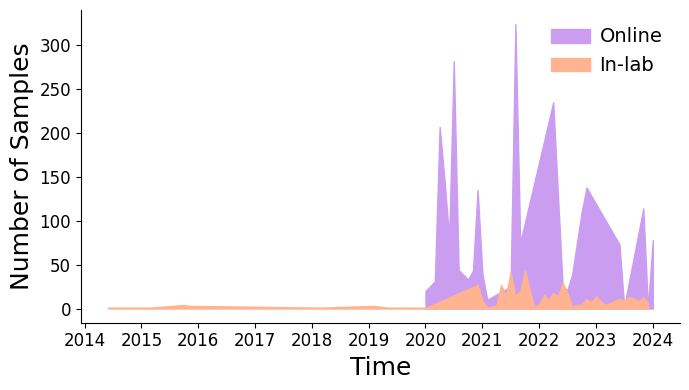

In [ ]:
# the variability dataset
# Plotting
plt.figure(figsize=(7, 4))

# Plot each group
plt.fill_between(data_overview_online_grouped['year_month'], data_overview_online_grouped['count'], alpha=1, color=color_by_source["Online"], label='Online')
#plt.plot(data_overview_online_grouped['year_month'], data_overview_online_grouped['count'], color='#b195C1', linewidth=2)

plt.fill_between(data_overview_lab_grouped['year_month'], data_overview_lab_grouped['count'], alpha=1, color=color_by_source["In lab"], label='In-lab')
#lt.plot(data_overview_lab_grouped['year_month'], data_overview_lab_grouped['count'], color='#f1b561', linewidth=2)

# Customizing the plot
plt.xlabel('Time', fontsize=18)
plt.ylabel('Number of Samples', fontsize=18)
plt.legend(frameon=False, fontsize=14, loc='upper right', handletextpad=0.5)

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.savefig(savepath + 'Figure_1a.jpeg', format='jpeg', dpi=300)
plt.show()



## (b) Online vs. In-lab total score comparison

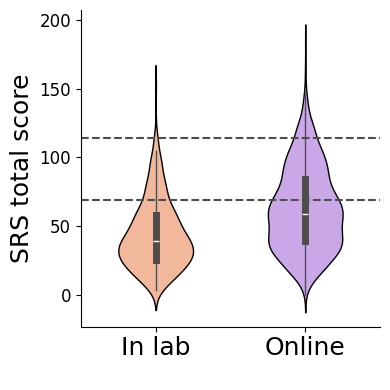

In [ ]:
#plot distributions for the two groups
fig,ax = plt.subplots(figsize=(4,4))
sns.violinplot(data=data_var, x="format", y="SRS", hue="format",ax=ax,
               palette=color_by_source, width = 0.5, inner_kws=dict(box_width=5, whis_width=1, color="0.3"))

for violin in ax.collections:  # Loop through the violin parts
    if hasattr(violin, 'set_edgecolor'):
        violin.set_edgecolor('black')  # Set border color to black
        violin.set_linewidth(1)       # Adjust border thickness


plt.axhline(y=69, color='0.3', linestyle='--')
plt.axhline(y=114, color='0.3', linestyle='--')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylabel('SRS total score',fontsize=18)
ax.set_xlabel(' ')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(savepath + 'Figure_1b.jpeg', format='jpeg', dpi=300)
plt.show()


## (c) Item-wise differences

<ipython-input-21-bd39b7349712>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=60,ha='right', fontsize=10)


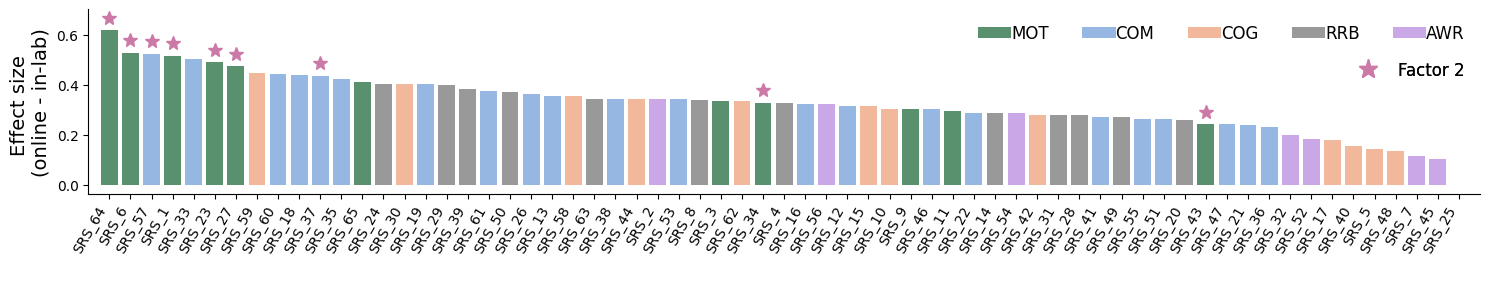

In [21]:
fig, ax = plt.subplots(figsize=(15, 3))
# sort by descending order of effect size
data_diff_online_lab = data_diff_online_lab.sort_values('Cohens_d_rev', ascending=False)
# replace the subscale names with all uppercase
data_diff_online_lab = data_diff_online_lab.replace({'mot': 'MOT', 'com': 'COM', 'cog': 'COG', 'awr': 'AWR', 'rrb': 'RRB'})


# plot
sns.barplot(data_diff_online_lab, x="SRS_item", y="Cohens_d_rev", hue="subscale", legend=True, ax=ax, palette = color_by_subscale)

for item in factor_2:
  y = data_diff_online_lab.loc[data_diff_online_lab['SRS_item'] == item, 'Cohens_d_rev'] + 0.05
  ax.plot(item, y, "*", markersize=10, color=star_color)

subscale_legend = ax.legend(frameon=False, fontsize=12, loc='upper right', ncol=5, handletextpad=0)
star_legend_handle = plt.Line2D([0], [0], marker='*', color=star_color, markerfacecolor=star_color, markersize=14, label="Factor 2", linestyle='None')
star_legend = ax.legend(handles=[star_legend_handle], loc='upper right', bbox_to_anchor=(1, 0.8), frameon=False, fontsize=12)
ax.add_artist(subscale_legend)
ax.add_artist(star_legend)

ax.set_xticklabels(ax.get_xticklabels(),rotation=60,ha='right', fontsize=10)
ax.set_xlabel(" ")
ax.set_ylabel("Effect size \n(online - in-lab)", fontsize=14)
ax.set_xlim([-1, 65])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(savepath + 'Figure_1c.jpeg', format='jpeg', dpi=300)
plt.show()

## (d) Predicting SRS using other variables

In [ ]:
# clean data
df_glm = data_var[['SRS', 'format', 'BDI', 'LSAS', 'STAI_trait', 'Gender_recode', 'age', 'date_ordinal']].dropna()
# run glm
model_var = smf.ols('SRS ~ format + scale(BDI) + scale(LSAS) + scale(STAI_trait) +  C(Gender_recode, Treatment(reference="W")) + scale(age) + scale(date_ordinal)',
                data=df_glm).fit()
#make summary df before plotting
coef = model_var.params[1:]
conf_int = model_var.conf_int()[1:]
glm_var_results = pd.DataFrame({
    'coef': coef.to_list(),
    'err': ((conf_int.loc[:,1] - conf_int.loc[:, 0]) / 2).to_list(),
    'lower': conf_int.loc[:, 0].to_list(),
    'upper': conf_int.loc[:, 1].to_list()
}, index=['Online>In-lab', 'Gender(M>W)', 'Gender(NB>W)','BDI','LSAS','STAI-T','Age','Date'])

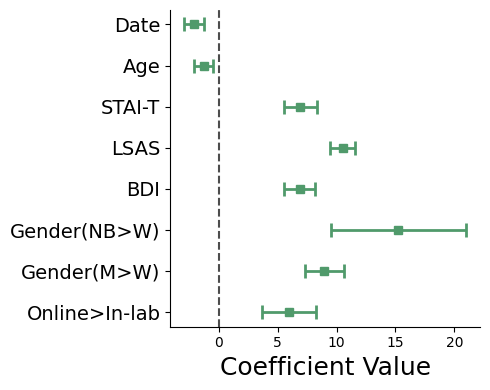

In [ ]:
#make a plot of the coefficients
fig, ax = plt.subplots(figsize=(5, 4))

y_pos = range(len(glm_var_results))
ax.errorbar(glm_var_results['coef'], y_pos, xerr=glm_var_results['err'],
            fmt='s', markersize=6, capsize=5, capthick=2, elinewidth=2, color=color_combined,
            ecolor = '#509a6b')
ax.axvline(x=0, color='0.3', linestyle='--')
ax.set_yticks(y_pos)
ax.set_yticklabels(glm_var_results.index, size=14)
ax.set_xlabel('Coefficient Value',size=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.tight_layout()
plt.savefig(savepath + 'Figure_1d.jpeg', format='jpeg', dpi=300)
plt.show()

# Figure 2: SRS stability

## (a) Overview of the Test-retest dataset

In [8]:
# the test-retest dataset
data_T1 = data_sta[["format","date_T1"]]
data_T2 = data_sta[["format","date_T2"]]
# reformat
data_T1_grouped = count_by_mo(data_T1,'date_T1')
data_T2_grouped = count_by_mo(data_T2,'date_T2')


<ipython-input-6-7c913fcc843c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data[datevar])
<ipython-input-6-7c913fcc843c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_month'] = data['date'].dt.to_period('M') # Extract the year-month (up to the month) from the date column
<ipython-input-6-7c913fcc843c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

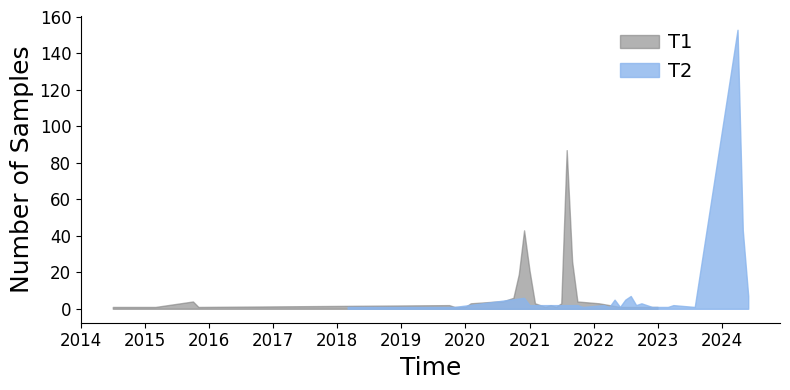

In [ ]:
# the stability dataset
# Plotting
plt.figure(figsize=(8, 4))

# Plot each group
plt.fill_between(data_T1_grouped['year_month'], data_T1_grouped['count'], alpha=0.6, color='gray', label='T1')
plt.fill_between(data_T2_grouped['year_month'], data_T2_grouped['count'], alpha=0.8, color='#8ab5ed', label='T2')

# Customizing the plot
plt.xlabel('Time', fontsize=18)
plt.ylabel('Number of Samples', fontsize=18)
plt.legend(frameon=False, fontsize=14, loc='upper right', bbox_to_anchor=(0.9, 1), handletextpad=0.5)

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.savefig(savepath + 'Figure_2a.jpeg', format='jpeg', dpi=300)
plt.show()


## (b) Test-retest interval

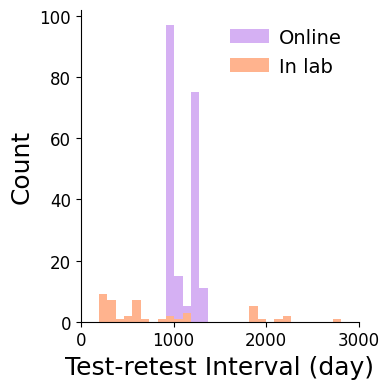

In [9]:
plt.figure(figsize=(4, 4))

interval_online = data_sta['T2_T1_diff'].loc[data_sta['format'] == 'Online']
interval_lab = data_sta['T2_T1_diff'].loc[data_sta['format'] == 'In lab']

# Define the number of bins and range for both histograms
bins = np.linspace(min(min(interval_online), min(interval_lab)), max(max(interval_online), max(interval_lab)), 30)

plt.hist(interval_online,bins=bins,alpha = 0.8, label = "Online",color = color_by_source['Online'])
plt.hist(interval_lab,bins=bins, alpha = 1, label = "In lab", color = color_by_source['In lab'])

plt.xlabel('Test-retest Interval (day)', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(frameon=False, fontsize=14, loc='upper right', handletextpad=0.5)

plt.xticks(range(0, 3001, 1000))

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(savepath + 'Figure_2b.jpeg', format='jpeg', dpi=300)
plt.show()

## (c) T1 and T2 correlation

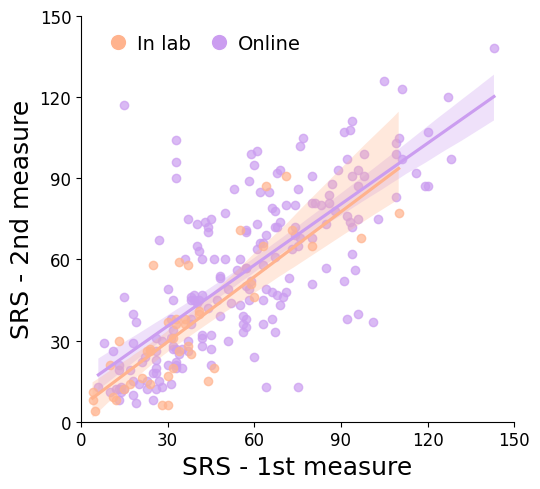

In [10]:
#plot correlation, broken down by format, subjects with time elapsed  > 6 months
fig, ax = plt.subplots(figsize=(5.5,5))
sns.regplot(data=data_sta[data_sta['format'] == 'Online'], x='SRS_T1', y='SRS_T2',
            scatter_kws={'alpha':0.7}, color=color_by_source["Online"], line_kws={"alpha": 1}, ci=95, ax=ax)
sns.regplot(data=data_sta[data_sta['format'] == 'In lab'], x='SRS_T1', y='SRS_T2', scatter_kws={'alpha':0.7},
            color=color_by_source["In lab"], ax=ax)
plt.setp(ax.collections[1], alpha=0.3)
plt.setp(ax.collections[3], alpha=0.3)

# ax.plot([0, 140], [0, 140], ls='--', c='0.3') # ref line

ax.set_xlabel('SRS - 1st measure', fontsize = 18)
ax.set_ylabel('SRS - 2nd measure', fontsize = 18)

ticks = range(0, 151, 30)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlim(0,150)
ax.set_ylim(0,150)

# customize legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='In lab',
               markerfacecolor=color_by_source["In lab"], markersize=12),  # Larger legend marker
    plt.Line2D([0], [0], marker='o', color='w', label='Online',
               markerfacecolor=color_by_source["Online"], markersize=12)
]
ax.legend(handles=legend_elements, frameon=False, fontsize=14,
          ncol=2, loc = 'upper left',handletextpad=0,columnspacing=0.4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(savepath + 'Figure_2c.jpeg', format='jpeg', dpi=300)
plt.show()


## (d) ICC

In [11]:
# In lab
# only take the total score and subscale
data_icc_lab_main = data_icc_lab.iloc[:6, ]
data_icc_lab_main['variable'] = pd.Categorical(data_icc_lab_main['variable'], categories=data_icc_lab_main['variable'], ordered=True)
data_icc_lab_srs = data_icc_lab_main.iloc[0,].to_frame().T
sorted_index = data_icc_lab_main.iloc[1:6,:].sort_values('ICC').index
data_icc_lab_main = data_icc_lab_main.iloc[1:6,:].sort_values('ICC').reset_index(drop=True)
data_icc_lab_main = pd.concat([data_icc_lab_main, data_icc_lab_srs], ignore_index=True)

# Calculate the errors
lower_errors = data_icc_lab_main['ICC'] - data_icc_lab_main['lower bound']  # Difference between mean and lower bound
upper_errors = data_icc_lab_main['upper bound'] - data_icc_lab_main['ICC']  # Difference between mean and upper bound
xerror = [lower_errors, upper_errors]  # Combine into a 2D array for asymmetric error bars

# rename
data_icc_lab_main['variable'] = data_icc_lab_main['variable'].replace({'SRS_AWR': 'AWR', 'SRS_COM': 'COM', 'SRS_RRB': 'RRB', 'SRS_MOT': 'MOT', 'SRS_COG':'COG'})

<ipython-input-11-5729c5892372>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_icc_lab_main['variable'] = pd.Categorical(data_icc_lab_main['variable'], categories=data_icc_lab_main['variable'], ordered=True)


In [12]:
# Online
# only take the total score and subscale
data_icc_online_main = data_icc_online.iloc[:6, ]
data_icc_online_main['variable'] = pd.Categorical(data_icc_online_main['variable'], categories=data_icc_online_main['variable'], ordered=True)
data_icc_online_srs = data_icc_online_main.iloc[0,].to_frame().T
data_icc_online_main = data_icc_online_main.iloc[1:6,:].reindex(sorted_index).reset_index(drop=True)
data_icc_online_main = pd.concat([data_icc_online_main, data_icc_online_srs], ignore_index=True)

# Calculate the errors
lower_errors_online = data_icc_online_main['ICC'] - data_icc_online_main['lower bound']  # Difference between mean and lower bound
upper_errors_online = data_icc_online_main['upper bound'] - data_icc_online_main['ICC']  # Difference between mean and upper bound
xerror_online = [lower_errors_online, upper_errors_online]  # Combine into a 2D array for asymmetric error bars


# rename
data_icc_online_main['variable'] = data_icc_online_main['variable'].replace({'SRS_AWR': 'AWR', 'SRS_COM': 'COM', 'SRS_RRB': 'RRB', 'SRS_MOT': 'MOT', 'SRS_COG':'COG'})

<ipython-input-12-2c22e0796d34>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_icc_online_main['variable'] = pd.Categorical(data_icc_online_main['variable'], categories=data_icc_online_main['variable'], ordered=True)


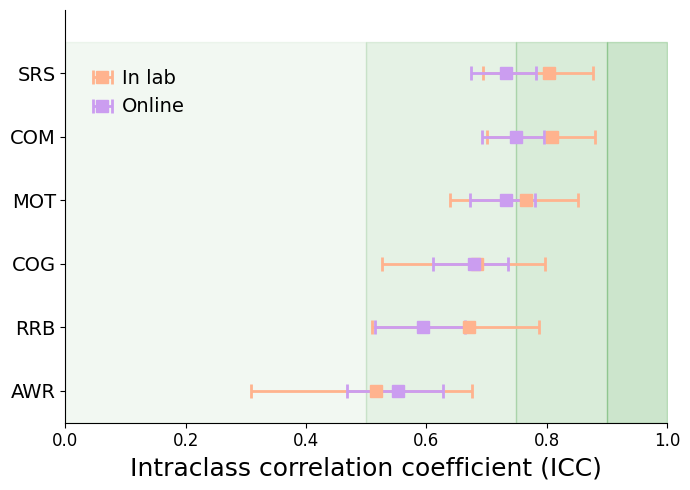

In [18]:
fig, ax = plt.subplots(figsize=(7, 5))
# fill the different criteria
ax.fill_betweenx((-0.5,5.5), 0, 0.5, color='green', alpha=0.05)
ax.fill_betweenx((-0.5,5.5), 0.5, 0.75, color='green', alpha=0.1)
ax.fill_betweenx((-0.5,5.5), 0.75, 0.9, color='green', alpha=0.15)
ax.fill_betweenx((-0.5,5.5), 0.9, 1, color='green', alpha=0.2)
# plot ICC
ax.errorbar(data_icc_lab_main['ICC'], data_icc_lab_main['variable'], xerr=xerror, label = 'In lab',
            fmt='s', markersize=8, capsize=5, capthick=2, elinewidth=2, color=color_by_source["In lab"])
ax.errorbar(data_icc_online_main['ICC'], data_icc_online_main['variable'], xerr=xerror_online, label = 'Online',
            fmt='s', markersize=8, capsize=5, capthick=2, elinewidth=2, color=color_by_source["Online"])
ax.legend(frameon=False, fontsize=14, loc='upper left',bbox_to_anchor=(0, 0.9), handletextpad=0)
ax.set_xlim([0,1])
ax.set_ylim([-0.5,6])
ax.set_xlabel('Intraclass correlation coefficient (ICC)',size=18)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(savepath + 'Figure_2d.jpeg', format='jpeg', dpi=300)
plt.show()

# Figure 3: variability in stability

## (a) T2 - T1

<ipython-input-13-9bafcbe35e25>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=10)


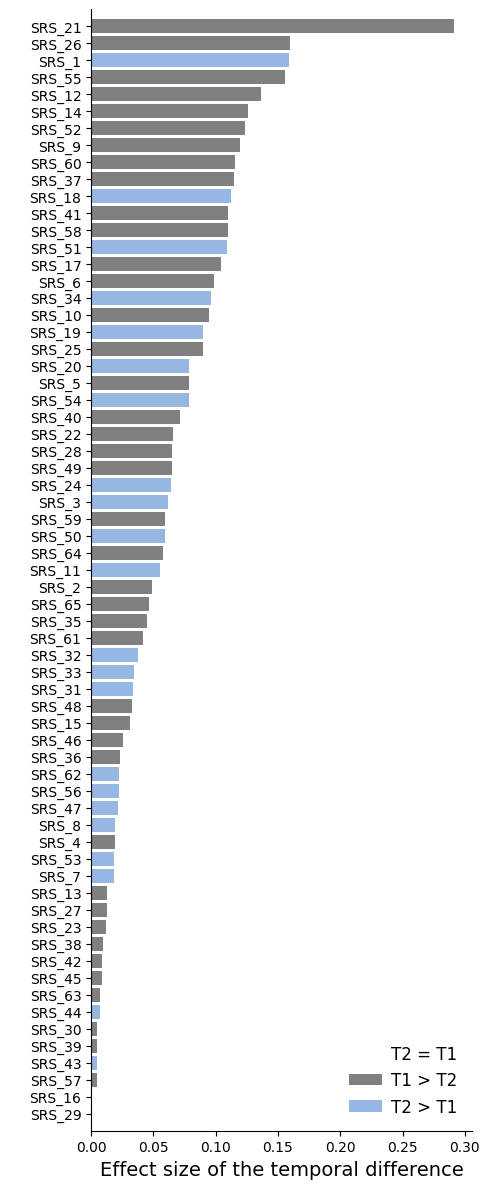

In [ ]:
# calculate the absolute cohen's d
data_diff_T2_T1['Cohens_d_abs'] = np.abs(data_diff_T2_T1['d'])
# sort the data by cohen's d
data_diff_T2_T1 = data_diff_T2_T1.sort_values('Cohens_d_abs', ascending=True)
# give labels to negative and positive d values
data_diff_T2_T1.loc[data_diff_T2_T1['d'] < 0, 'direction'] = 'T1 > T2'
data_diff_T2_T1.loc[data_diff_T2_T1['d'] > 0, 'direction'] = 'T2 > T1'
data_diff_T2_T1.loc[data_diff_T2_T1['d'] == 0, 'direction'] = 'T2 = T1'

# plot
fig,ax = plt.subplots(figsize=(5, 12))
sns.barplot(data_diff_T2_T1, x="Cohens_d_abs", y="SRS_item", hue="direction", legend=True, ax=ax, palette = color_by_time2)

ax.legend(frameon=False, fontsize=12, loc='lower right',  handletextpad=0.5)

ax.set_yticklabels(ax.get_yticklabels(),fontsize=10)
ax.set_ylabel(" ")
ax.set_xlabel("Effect size of the temporal difference", fontsize=14)
ax.set_ylim([-1, 65])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(savepath + 'Figure_S1a.jpeg', format='jpeg', dpi=300)
plt.show()


## (b) item-wise ICC

In [193]:
data_icc_lab_item = data_icc_lab.iloc[6:, ]
data_icc_lab_item['variable'] = pd.Categorical(data_icc_lab_item['variable'], categories=data_icc_lab_item['variable'], ordered=True)
sorted_index = data_icc_lab_item.sort_values('ICC').index
data_icc_lab_item = data_icc_lab_item.sort_values('ICC').reset_index(drop=True)

# Calculate the errors
lower_errors = data_icc_lab_item['ICC'] - data_icc_lab_item['lower bound']  # Difference between mean and lower bound
upper_errors = data_icc_lab_item['upper bound'] - data_icc_lab_item['ICC']  # Difference between mean and upper bound
xerror_lab = [lower_errors, upper_errors]  # Combine into a 2D array for asymmetric error bars


<ipython-input-193-7cdea601b53c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_icc_lab_item['variable'] = pd.Categorical(data_icc_lab_item['variable'], categories=data_icc_lab_item['variable'], ordered=True)


In [194]:
data_icc_online_item = data_icc_online.iloc[6:, ]
data_icc_online_item['variable'] = pd.Categorical(data_icc_online_item['variable'], categories=data_icc_online_item['variable'], ordered=True)
data_icc_online_item = data_icc_online_item.reindex(sorted_index).reset_index(drop=True)
# Calculate the errors
lower_errors = data_icc_online_item['ICC'] - data_icc_online_item['lower bound']  # Difference between mean and lower bound
upper_errors = data_icc_online_item['upper bound'] - data_icc_online_item['ICC']  # Difference between mean and upper bound
xerror_online = [lower_errors, upper_errors]  # Combine into a 2D array for asymmetric error bars

<ipython-input-194-6e2fd9ebfe39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_icc_online_item['variable'] = pd.Categorical(data_icc_online_item['variable'], categories=data_icc_online_item['variable'], ordered=True)


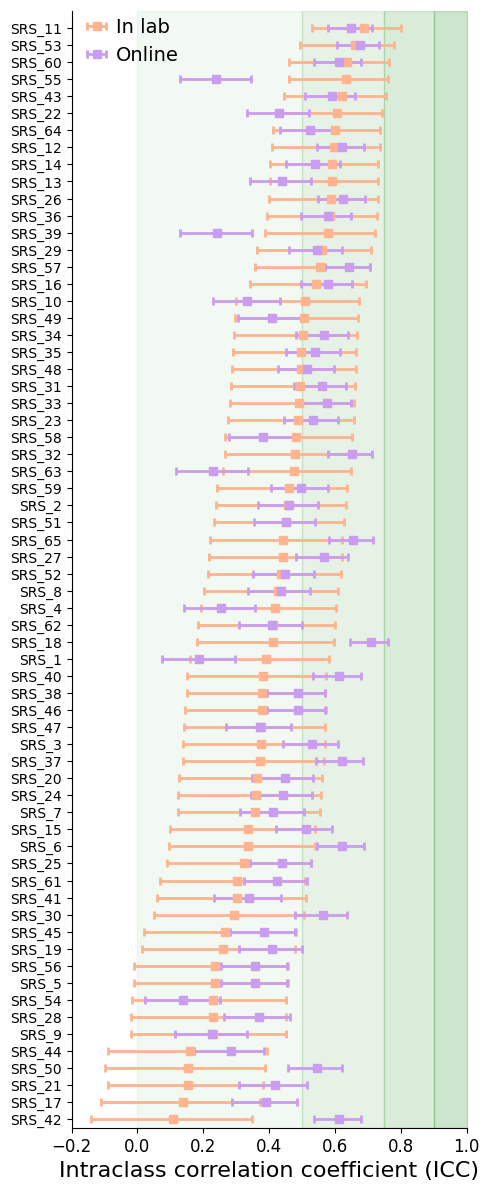

In [198]:
fig, ax = plt.subplots(figsize=(5, 12))
# fill the different criteria
ax.fill_betweenx((-0.5,65), 0, 0.5, color='green', alpha=0.05)
ax.fill_betweenx((-0.5,65), 0.5, 0.75, color='green', alpha=0.1)
ax.fill_betweenx((-0.5,65), 0.75, 0.9, color='green', alpha=0.15)
ax.fill_betweenx((-0.5,65), 0.9, 1, color='green', alpha=0.2)
# plot ICC
ax.errorbar(data_icc_lab_item['ICC'], data_icc_lab_item['variable'], xerr=xerror_lab, label = 'In lab',
            fmt='s', markersize=6, capsize=3, capthick=2, elinewidth=2, color=color_by_source["In lab"])
ax.errorbar(data_icc_online_item['ICC'], data_icc_online_item['variable'], xerr=xerror_online, label = 'Online',
            fmt='s', markersize=6, capsize=3, capthick=2, elinewidth=2, color=color_by_source["Online"])
ax.legend(frameon=False, fontsize=14, loc='upper left',bbox_to_anchor=(-0.03, 1.01), handletextpad=0)
ax.set_xlim([-0.2,1])
ax.set_ylim([-0.5,65])
ax.set_xlabel('Intraclass correlation coefficient (ICC)',size=16)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(savepath + 'Figure_3b.jpeg', format='jpeg', dpi=300)
plt.show()

## (c) Item-wise ICC ~ Online - In-lab difference

In [78]:
data_icc_both = data_icc_both.iloc[6:, ]
data_icc_both['SRS_item'] = pd.Categorical(data_icc_both['variable'], categories=data_icc_both['variable'], ordered=True)
ICC_diff_item = data_icc_both.merge(data_diff_online_lab, on='SRS_item', how='left')
ICC_diff_item['isFactor2'] = ICC_diff_item['Factor_OLpaper'].apply(lambda x: True if x == 2 else False)
ICC_diff_item['abs_diff'] = np.abs(ICC_diff_item['In lab mean'] - ICC_diff_item['Online mean'])
ICC_diff_item = ICC_diff_item.replace({'mot': 'MOT', 'com': 'COM', 'cog': 'COG', 'awr': 'AWR', 'rrb': 'RRB'})


In [162]:
import matplotlib.lines as mlines

subscale_handles = []
for subscale, color in color_by_subscale.items():
    handle = mlines.Line2D([], [], color=color, marker='o', linestyle='None', markersize=10, label=subscale)
    subscale_handles.append(handle)

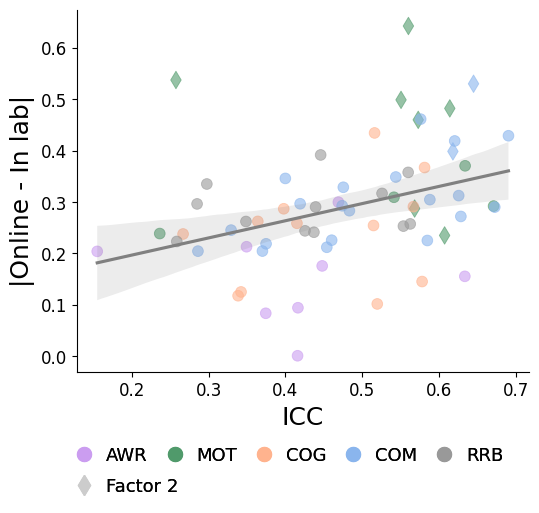

In [186]:
#correlation between ICC_all and abs_diff_online_inlab
fig, ax = plt.subplots(1,1,figsize=(5.5,4.5))
sns.scatterplot(data=ICC_diff_item, x='ICC',  y='abs_diff', hue = 'subscale',
                style='isFactor2',markers={True: "d", False: "o"},
                size='isFactor2', sizes={True: 80, False: 60},
                alpha=0.6, palette = color_by_subscale, edgecolors='face', ax=ax, legend=False)
sns.regplot(data=ICC_diff_item, x='ICC', y='abs_diff', scatter=False, color='0.5',ax=ax)

# Create two legends
subscale_legend = fig.legend(handles = subscale_handles, frameon=False, fontsize=13,
                            bbox_to_anchor=(0.1, -0.08),  columnspacing = 0.5,handletextpad=0.2,
                            ncol=5, loc='lower left')
factor2_legend_handle = plt.Line2D([0], [0], marker='d', color='0.8', markerfacecolor='0.8', markersize=10, label="Factor 2", linestyle='None')
factor2_legend = fig.legend(handles=[factor2_legend_handle], frameon=False, fontsize=13,handletextpad=0.2,
                            bbox_to_anchor=(0.1, -0.15),
                            loc='lower left')

ax.add_artist(subscale_legend)
ax.add_artist(factor2_legend)


ax.set_xlabel('ICC', fontsize = 18)
ax.set_ylabel('|Online - In lab|', fontsize = 18)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(savepath + 'Figure_3c.jpeg', bbox_inches='tight',format='jpeg', dpi=300)
plt.show()


## (d) Predicting stability using other variables

In [172]:
data_sta['SRS_diff_abs'] = np.abs(data_sta['SRS_T2'] - data_sta['SRS_T1'])
data_sta['date_ordinal_T1_z'] = zscore(data_sta['date_ordinal_T1'].astype(float))
data_sta['date_ordinal_T2_z'] = zscore(data_sta['date_ordinal_T2'].astype(float))
data_sta['T2_T1_diff'] = data_sta['date_ordinal_T2'] - data_sta['date_ordinal_T1']
data_sta['T2_T1_diff_z'] = zscore(data_sta['T2_T1_diff'].astype(float))
data_sta['BDI_diff_abs'] = np.abs(data_sta['BDI_T2'] - data_sta['BDI_T1'])
data_sta['LSAS_diff_abs'] = np.abs(data_sta['LSAS_T2'] - data_sta['LSAS_T1'])
data_sta['STAI_trait_diff_abs'] = np.abs(data_sta['STAI_trait_T2'] - data_sta['STAI_trait_T1'])

df_glm_trt_cutoff = data_sta[['SRS_diff_abs', 'format', 'Sex', 'age_T1', 'BDI_diff_abs', 'LSAS_diff_abs', 'STAI_trait_diff_abs',
                       'SRS_T1', 'date_ordinal_T1_z','T2_T1_diff_z']].dropna()


#glm
model_trt_cutoff = smf.ols('SRS_diff_abs ~ format + Sex + scale(age_T1) + scale(BDI_diff_abs) + scale(LSAS_diff_abs) + scale(STAI_trait_diff_abs) + \
                    scale(SRS_T1) + date_ordinal_T1_z + T2_T1_diff_z', data=df_glm_trt_cutoff).fit()

#make summary df before plotting
coef = model_trt_cutoff.params[1:]
conf_int = model_trt_cutoff.conf_int()[1:]
glm_sta_abs_results = pd.DataFrame({
    'coef': coef.to_list(),
    'err': ((conf_int.loc[:,1] - conf_int.loc[:, 0]) / 2).to_list(),
    'lower': conf_int.loc[:, 0].to_list(),
    'upper': conf_int.loc[:, 1].to_list()
}, index=['Online>In-lab', 'Sex(m>f)', 'Age T1','BDI |T2 - T1|','LSAS |T2 - T1|','STAI-T |T2 - T1|','SRS T1','Date T1','Time interval'])



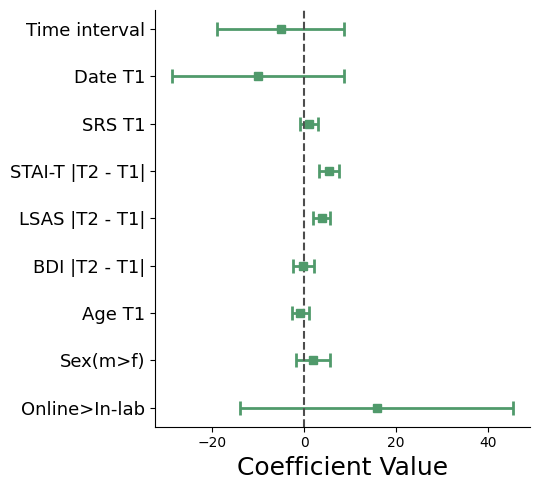

In [188]:
#make a plot of the coefficients
fig, ax = plt.subplots(figsize=(5.5, 5))
y_pos = range(len(glm_sta_abs_results))
ax.errorbar(glm_sta_abs_results['coef'], y_pos, xerr=glm_sta_abs_results['err'],
            fmt='s', markersize=6, capsize=5, capthick=2, elinewidth=2, color=color_combined,
            ecolor = '#509a6b')
ax.axvline(x=0, color='0.3', linestyle='--')
ax.set_yticks(y_pos)
ax.set_yticklabels(glm_sta_abs_results.index, size=13)
ax.set_xlabel('Coefficient Value',size=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(savepath + 'Figure_3d.jpeg', format='jpeg', dpi=300)
plt.show()

## (e)(f) SRS change prediction is directional

In [189]:
# with > 6-month cutoff
data_sta['SRS_diff'] = data_sta['SRS_T2'] - data_sta['SRS_T1']
data_sta['LSAS_diff'] = data_sta['LSAS_T2'] - data_sta['LSAS_T1']
data_sta['STAI_trait_diff'] = data_sta['STAI_trait_T2'] - data_sta['STAI_trait_T1']
data_sta['BDI_diff'] = data_sta['BDI_T2'] - data_sta['BDI_T1']

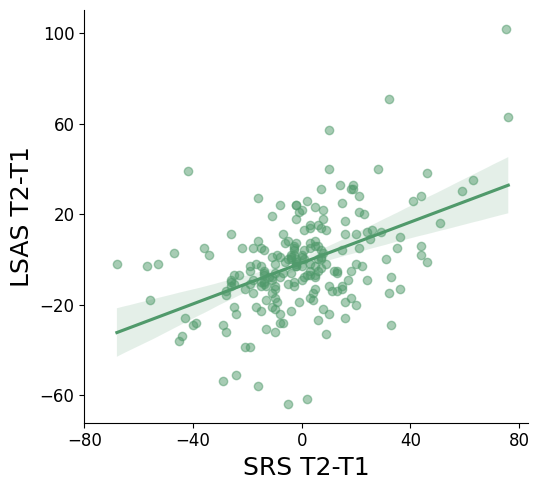

In [191]:
# LSAS
fig, ax = plt.subplots(figsize=(5.5,5))
#corr_lsas = data_sta['LSAS_diff'].corr(data_sta['SRS_diff'])
sns.regplot(data=data_sta, y='SRS_diff', x='LSAS_diff', ax=ax, color = color_combined, scatter_kws={'alpha': 0.5})

ax.set_xlabel('SRS T2-T1', fontsize = 18)
ax.set_ylabel('LSAS T2-T1', fontsize = 18)

ax.set_yticks(range(-60, 101, 40))
ax.set_xticks(range(-80, 81, 40))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(savepath + 'Figure_3e.jpeg', format='jpeg', dpi=300)
plt.show()


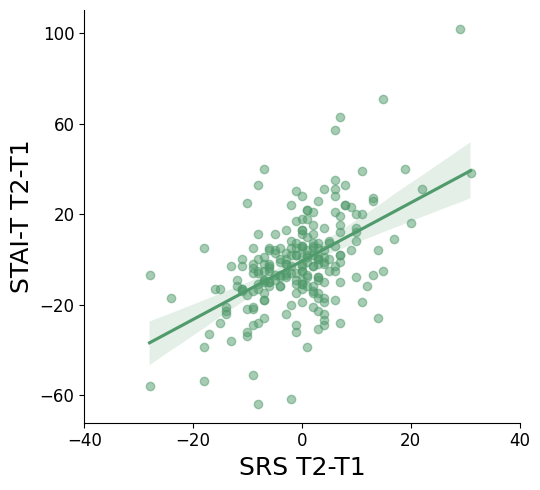

In [192]:
# STAI
fig, ax = plt.subplots(figsize=(5.5,5))
sns.regplot(data=data_sta, y='SRS_diff', x='STAI_trait_diff', ax=ax, color = color_combined, scatter_kws={'alpha': 0.5})

ax.set_xlabel('SRS T2-T1', fontsize = 18)
ax.set_ylabel('STAI-T T2-T1', fontsize = 18)

ax.set_yticks(range(-60, 101, 40))
ax.set_xticks(range(-40, 41, 20))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(savepath + 'Figure_3f.jpeg', format='jpeg', dpi=300)
plt.show()

